In [86]:
import pandas as pd
import numpy as np

In [310]:
df = pd.read_csv("time_series_covid19_confirmed_global.csv")


In [88]:
df1 = df.drop(['Lat','Long'], axis = 1)

In [89]:
df2 = df1[df1['Country/Region'].duplicated()==True].groupby('Country/Region').sum()

In [90]:
df2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,4,5,5,6,9,9,...,5701,5799,5911,6008,6112,6200,6212,6249,6312,6337
Canada,0,0,0,0,1,1,2,2,2,4,...,15313,16499,17768,19231,20608,21749,22731,23947,25164,26338
China,547,634,905,1367,2015,2807,5403,5935,7941,9565,...,81675,81728,81819,81892,81950,82023,82143,82222,82315,82365
Denmark,0,0,0,0,0,0,0,0,0,0,...,4692,5082,5413,5646,5830,6007,6185,6329,6522,6692
France,0,0,2,3,3,3,4,5,5,5,...,98891,109993,113882,118698,125848,130644,133584,137789,131275,134496
Netherlands,0,0,0,0,0,0,0,0,0,0,...,18855,19635,20605,21821,23163,24479,25654,26618,27488,28223
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,52240,55910,61435,65824,74557,79826,85149,89513,94788,99402


In [250]:
China = df2[df2.index == 'China']
Canada = df2[df2.index == 'Canada']
data1 = {'Canada': np.array(Canada.stack()), "China":np.array(China.stack())}

In [252]:
df_canada_vs_china = pd.DataFrame(columns = ['Canada','China'],index = df2.columns, data = data1)

In [330]:
df_canada_vs_china[:50]

,Canada,China
1/22/20,0,547
1/23/20,0,634
1/24/20,0,905
1/25/20,0,1367
1/26/20,1,2015
1/27/20,1,2807
1/28/20,2,5403
1/29/20,2,5935
1/30/20,2,7941
1/31/20,4,9565


In [95]:
import seaborn as sns
import pyecharts as pct
import matplotlib.pyplot as plt

In [278]:
sns.set_style('darkgrid')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a93949f10>,
      dtype=object)

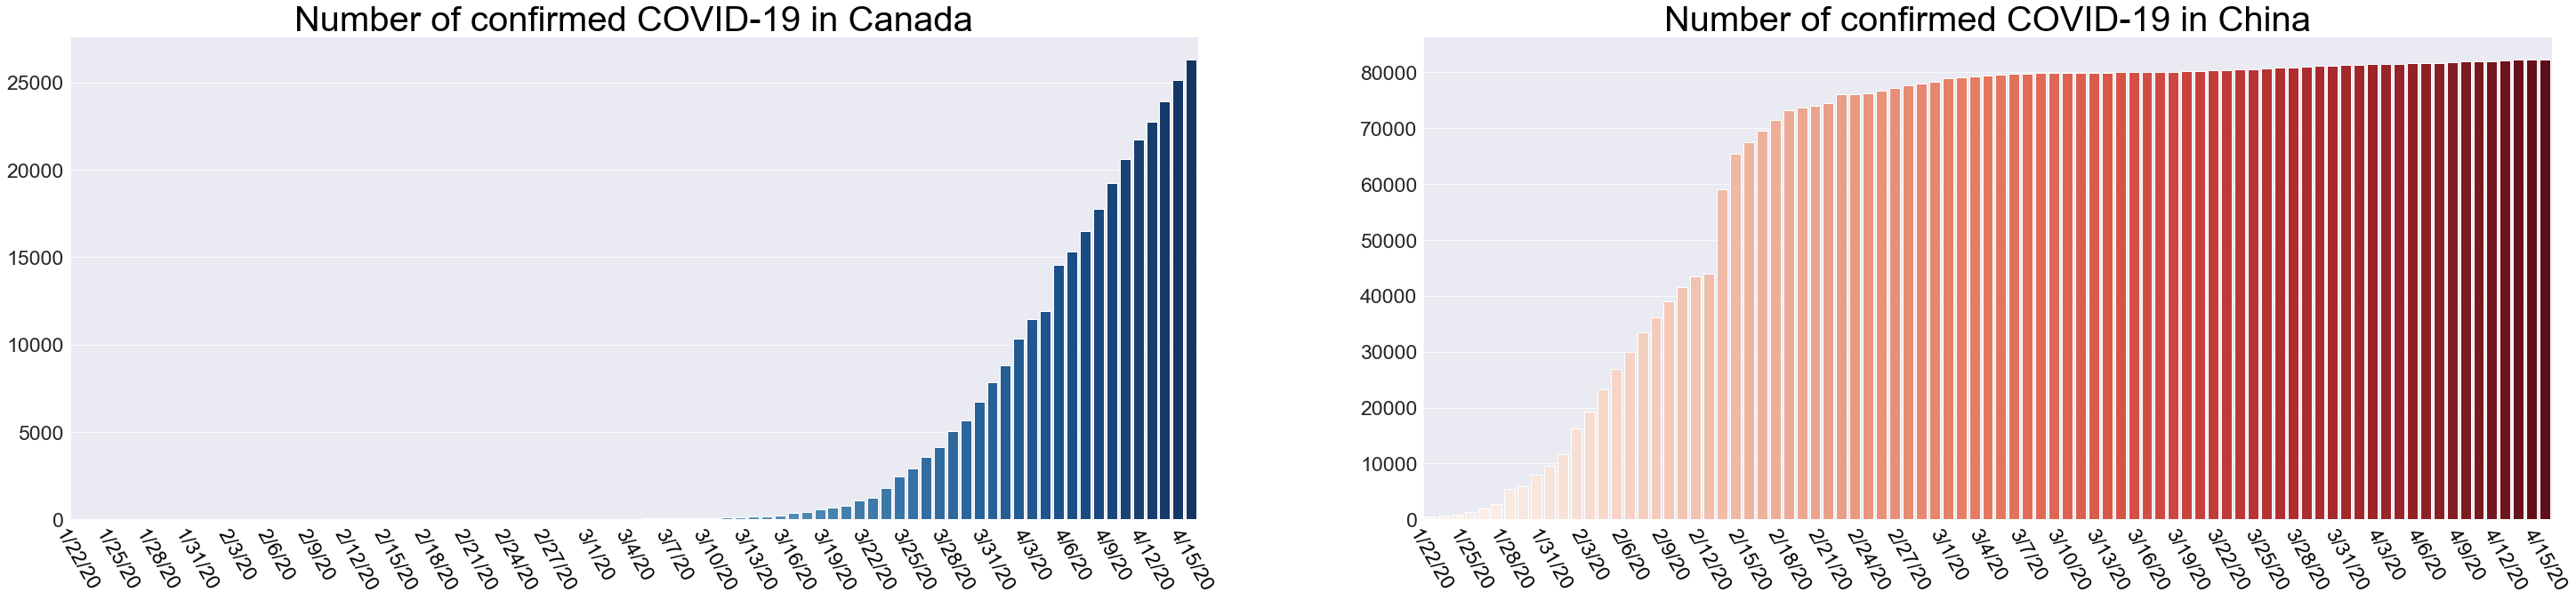

In [298]:
fig, axes = plt.subplots(1,2, figsize=(50,10))
sns.barplot(x= df_canada_vs_china.index, y="Canada", 
             data=df_canada_vs_china,
             ax = axes[0],
             palette = sns.color_palette("Blues",len(df_canada_vs_china),),
)

x=[]
x_axis_ticks = df_canada_vs_china.index
for i in range(0,len(x_axis_ticks),3):
    x.append(x_axis_ticks[i])
    x.append(' ')
    x.append(' ')

axes[0].set_xticklabels(x, rotation=-60,fontdict = {'fontsize':20}, color = 'black')
axes[0].tick_params(labelsize=23)
#axes[0].set_yticklabels(df_canada_vs_china[''].values, fontdict = {'fontsize':20})
axes[0].set_title("Number of confirmed COVID-19 in Canada",color = 'black',fontsize = 40)
axes[0].set_ylabel(ylabel = '')

sns.barplot(x= df_canada_vs_china.index, y="China", 
            data=df_canada_vs_china,ax = axes[1],
            palette = sns.color_palette("Reds",len(df_canada_vs_china)))

axes[1].set_xticklabels(x, rotation=-60,fontdict = {'fontsize':20}, color = 'black')
axes[1].tick_params(labelsize=23)
axes[1].set_title("Number of confirmed COVID-19 in China",color = 'black',fontsize = 40)
axes[1].set_ylabel(ylabel = '')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
axes


In [312]:
df_canada_vs_china.pct_change(periods = 1)

,Canada,China
1/22/20,NaN,NaN
1/23/20,NaN,0.159049
1/24/20,NaN,0.427445
1/25/20,NaN,0.510497
1/26/20,inf,0.474031
...,...,...
4/11/20,0.055367,0.000891
4/12/20,0.045152,0.001463
4/13/20,0.053495,0.000962
4/14/20,0.050821,0.001131


In [369]:
df_canada_vs_china_rollingdiff['Canada'] = (df_canada_vs_china_rollingdiff['Canada'] - 
                                            df_canada_vs_china_rollingdiff['Canada'].mean())/df_canada_vs_china_rollingdiff['Canada'].std()

df_canada_vs_china_rollingdiff['China'] = (df_canada_vs_china_rollingdiff['China'] - 
                                            df_canada_vs_china_rollingdiff['China'].mean())/df_canada_vs_china_rollingdiff['China'].std()

In [372]:
df_canada_vs_china_rollingdiff = pd.DataFrame(data = df_canada_vs_china.diff(), 
                                             columns = ['Canada','China'])

In [373]:
df_canada_vs_china_rollingdiff

,Canada,China
1/22/20,NaN,NaN
1/23/20,0.0,87.0
1/24/20,0.0,271.0
1/25/20,0.0,462.0
1/26/20,1.0,648.0
...,...,...
4/11/20,1141.0,73.0
4/12/20,982.0,120.0
4/13/20,1216.0,79.0
4/14/20,1217.0,93.0


In [338]:

from pyecharts.charts import Line
import pyecharts.options as opts


In [377]:
line = Line(init_opts=opts.InitOpts(width="1000px", height="800px"))

line.add_xaxis(list(df_canada_vs_china_rollingdiff.index[-30:]))

line.add_yaxis("Canada",
               list(df_canada_vs_china_rollingdiff['Canada'][-30:]),
               #markpoint_opts=opts.MarkPointOpts(
               #    data=[opts.MarkPointItem(type_="max", name="最大值"),
               #          opts.MarkPointItem(type_="min", name="最小值"),])
               is_symbol_show= False,
)
line.add_yaxis("China",
               list(df_canada_vs_china_rollingdiff['China'][-30:])
              )


line.set_global_opts(title_opts=opts.TitleOpts(title="China vs Canada daily new cases"))
line.render_notebook()